## 3 indikator terpakai (GDP, HDI, Suicide Rate)

In [ ]:
import pandas as pd

#df_hdi = pd.read_excel("./External-Dataset/HDI.xlsx")
df_hdi = pd.read_excel("HDI.xlsx")

df_hdi.columns = df_hdi.columns.str.strip()
df_hdi = df_hdi[['Country', 'Human Development Index (HDI)']].dropna()
df_hdi = df_hdi.rename(columns={
    'Country': 'Country Name',
    'Human Development Index (HDI)': 'HDI_2023'
})
df_hdi['Country Name'] = df_hdi['Country Name'].str.strip()

df = pd.read_csv("WDICSV-rev.csv")

wdi_names = set(df['Country Name'].unique())
hdi_names = set(df_hdi['Country Name'].unique())

missing_in_wdi = sorted(list(hdi_names - wdi_names))
print("Negara di HDI tapi tidak ditemukan di WDI:", len(missing_in_wdi))
print(missing_in_wdi[:20])  # tampilkan sebagian

missing_in_hdi = sorted(list(wdi_names - hdi_names))
print("\nNegara di WDI tapi tidak ditemukan di HDI:", len(missing_in_hdi))
print(missing_in_hdi[:20])

Negara di HDI tapi tidak ditemukan di WDI: 25
['Bahamas', 'Bolivia (Plurinational State of)', 'Congo', 'Congo (Democratic Republic of the)', "Côte d'Ivoire", 'Egypt', 'Eswatini (Kingdom of)', 'Gambia', 'Hong Kong, China (SAR)', 'Iran (Islamic Republic of)', "Korea (Democratic People's Rep. of)", 'Korea (Republic of)', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Palestine, State of', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines']

Negara di WDI tapi tidak ditemukan di HDI: 96
['Africa Eastern and Southern', 'Africa Western and Central', 'American Samoa', 'Arab World', 'Aruba', 'Bahamas, The', 'Bermuda', 'Bolivia', 'British Virgin Islands', 'Caribbean small states', 'Cayman Islands', 'Central Europe and the Baltics', 'Channel Islands', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Curacao', 'Early-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)

In [ ]:
# ini mau samain aja nama nama negaranya dari 2 dataset berbeda tadi
rename_map = {
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Congo': 'Congo, Rep.',
    'Congo (Democratic Republic of the)': 'Congo, Dem. Rep.',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Egypt': 'Egypt, Arab Rep.',
    'Eswatini (Kingdom of)': 'Eswatini',
    'Gambia': 'Gambia, The',
    'Hong Kong, China (SAR)': 'Hong Kong SAR, China',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
    "Korea (Democratic People's Rep. of)": 'Korea, Dem. People’s Rep.',
    'Korea (Republic of)': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    "Lao People's Democratic Republic": 'Lao PDR',
    'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.',
    'Moldova (Republic of)': 'Moldova',
    'Palestine, State of': 'West Bank and Gaza',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines'
}

In [ ]:
df_hdi['Country Name'] = df_hdi['Country Name'].replace(rename_map)

wdi_names = set(df['Country Name'].unique())
hdi_names = set(df_hdi['Country Name'].unique())

missing_in_wdi = sorted(list(hdi_names - wdi_names))
print("Masih belum cocok:", missing_in_wdi)

Masih belum cocok: ['Korea, Dem. People’s Rep.', 'Slovakia', 'Tanzania (United Republic of)', 'Türkiye', 'Venezuela (Bolivarian Republic of)', 'Yemen']


In [ ]:
extra_map = {
    'Korea, Dem. People’s Rep.': "Korea, Dem. People's Rep.",
    'Slovakia': 'Slovak Republic',
    'Tanzania (United Republic of)': 'Tanzania',
    'Türkiye': 'Turkiye',
    'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
    'Yemen': 'Yemen, Rep.'
}

rename_map.update(extra_map)

df_hdi['Country Name'] = df_hdi['Country Name'].replace(rename_map)

wdi_names = set(df['Country Name'].unique())
hdi_names = set(df_hdi['Country Name'].unique())

missing_in_wdi = sorted(list(hdi_names - wdi_names))
print("Masih belum cocok:", missing_in_wdi)

Masih belum cocok: []


In [ ]:
print(df.columns[-10:])

if '2023' in df.columns:
    print(df['2023'].notna().sum())
else:
    print("Kolom 2023 tidak ada di file WDI.")

Index(['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'],
      dtype='object')
150169


In [ ]:
# Cek tahun terakhir yang punya data non-null untuk masing-masing indikator
indicators = ["NY.GDP.PCAP.KD", "SH.STA.SUIC.P5"]

for ind in indicators:
    subset = df[df["Indicator Code"] == ind]
    valid_counts = subset.loc[:, "1960":].notna().sum().sort_index(ascending=False)
    latest_year = valid_counts[valid_counts > 0].index[0]
    print(f"{ind} → tahun terakhir dengan data:", latest_year)

NY.GDP.PCAP.KD → tahun terakhir dengan data: 2024
SH.STA.SUIC.P5 → tahun terakhir dengan data: 2021


Jadi ternyata yang suicide tahun 2023nya ngak apunya data, jadi ngak kedetect sebelumnya. Sebenarnya ngak masalah ambil data tahun 2024 biat gdp, 2021 buat suicide karna harusnya dua hal ini dari tahun ke tahun ngak signifikan bedanya. Cuma ahrus transparan aja kasi tau ini bukan pure bandingin semua data 2023.

## Cara 1: dibanding ambil tahun beda beda buat dianalisis, yang GDP sama suicide ambil rata-rata 5 tahun terakhir aja

In [ ]:
# Ini dibanding ambil tahun beda beda buat dianalisis, yang GDP sama suicide ambil rata-rata 5 tahun terakhir aja
indicators = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "SH.STA.SUIC.P5": "Suicide_rate"
}

years = ['2018', '2019', '2020', '2021', '2022']

df_sel = df[df["Indicator Code"].isin(indicators.keys())].copy()

df_sel["mean_5yr"] = df_sel[years].mean(axis=1, skipna=True)

df_mean = df_sel[["Country Name", "Indicator Code", "mean_5yr"]]

df_mean = df_mean.drop_duplicates(subset=["Country Name", "Indicator Code"])

df_pivot = df_mean.pivot(index="Country Name", columns="Indicator Code", values="mean_5yr").reset_index()
df_pivot = df_pivot.rename(columns=indicators)

df_merge_mean = pd.merge(df_pivot, df_hdi, on="Country Name", how="inner").dropna()

df_merge_mean.head()

,Country Name,GDP_per_capita,Suicide_rate,HDI_2023
0,Afghanistan,485.022544,3.5450,0.496
1,Albania,4702.593151,3.4300,0.81
2,Algeria,4550.913354,2.0025,0.763
4,Angola,2528.206553,7.5475,0.616
5,Antigua and Barbuda,17011.981288,0.5575,0.851


In [ ]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['HDI_2023', 'GDP_per_capita', 'Suicide_rate']:
    df_merge_mean[col] = pd.to_numeric(df_merge_mean[col], errors='coerce')

df_merge_mean = df_merge_mean.dropna(subset=['HDI_2023', 'GDP_per_capita', 'Suicide_rate'])

corr_matrix = df_merge_mean[['HDI_2023', 'GDP_per_capita', 'Suicide_rate']].corr(method='pearson')

r_hdi_suicide, p_hdi_suicide = pearsonr(df_merge_mean['HDI_2023'], df_merge_mean['Suicide_rate'])
r_gdp_suicide, p_gdp_suicide = pearsonr(df_merge_mean['GDP_per_capita'], df_merge_mean['Suicide_rate'])

print("📈 Korelasi Matrix:")
print(corr_matrix.round(3))
print(f"\nHDI ↔ Suicide Rate: r = {r_hdi_suicide:.3f}, p = {p_hdi_suicide:.4f}")
print(f"GDP ↔ Suicide Rate: r = {r_gdp_suicide:.3f}, p = {p_gdp_suicide:.4f}")

📈 Korelasi Matrix:
                HDI_2023  GDP_per_capita  Suicide_rate
HDI_2023           1.000           0.701         0.238
GDP_per_capita     0.701           1.000         0.193
Suicide_rate       0.238           0.193         1.000

HDI ↔ Suicide Rate: r = 0.238, p = 0.0013
GDP ↔ Suicide Rate: r = 0.193, p = 0.0096


Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)
Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier


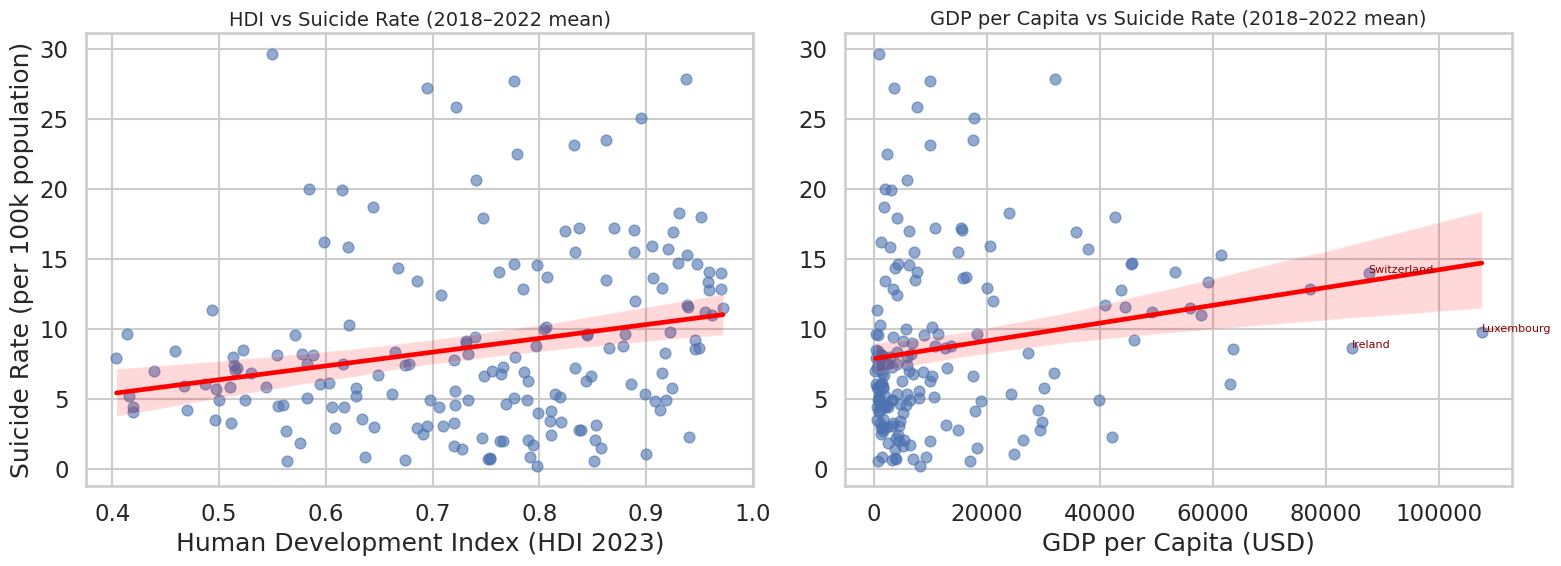

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot 1: HDI vs Suicide Rate
sns.regplot(
    x='HDI_2023', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[0]
)
axes[0].set_title('HDI vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[0].set_xlabel('Human Development Index (HDI 2023)')
axes[0].set_ylabel('Suicide Rate (per 100k population)')
print("Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)")

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[1]
)
axes[1].set_title('GDP per Capita vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[1].set_xlabel('GDP per Capita (USD)')
axes[1].set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier")

# Identifikasi outlier GDP tinggi
outliers = df_merge_mean[df_merge_mean['GDP_per_capita'] > 80000]

for _, row in outliers.iterrows():
    plt.text(row['GDP_per_capita'], row['Suicide_rate'], row['Country Name'],
             fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga


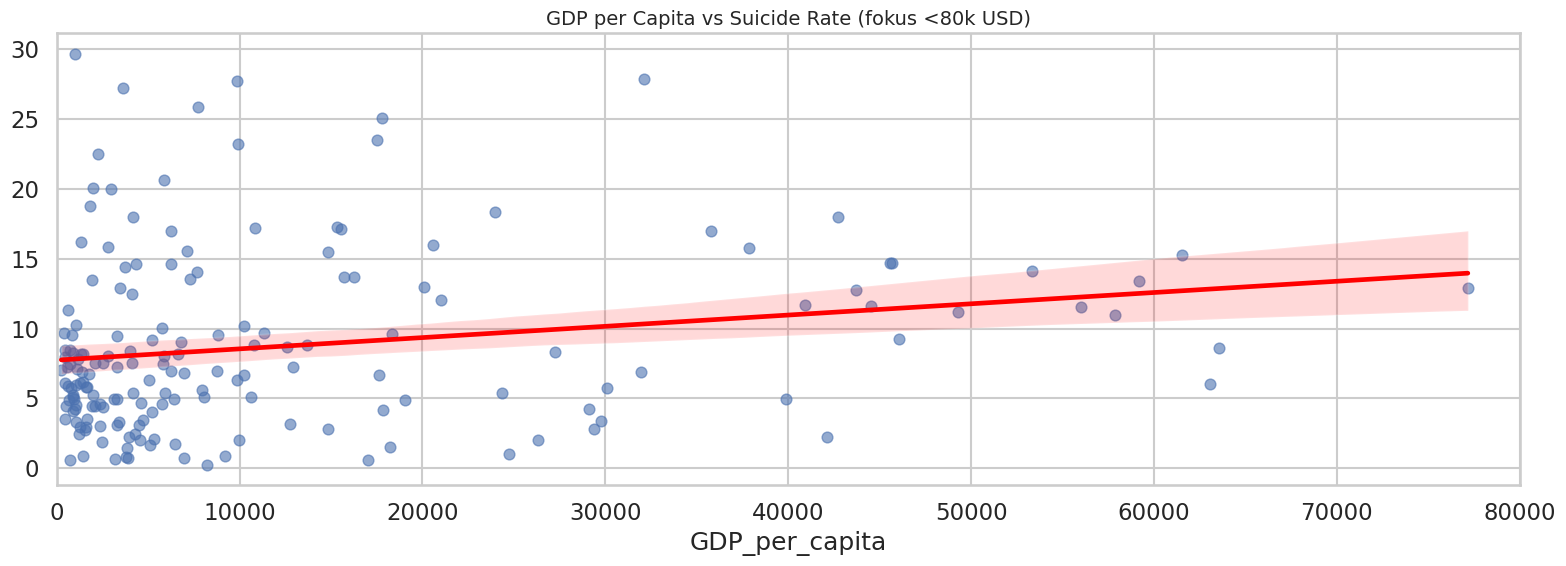

In [ ]:
# buat sampe 80000-an aja si-x nya, biar motong outliernya

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, figsize=(16, 6))

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean[df_merge_mean['GDP_per_capita'] < 80000],
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes
)
axes.set_xlim(0, 80000)
axes.set_title('GDP per Capita vs Suicide Rate (fokus <80k USD)', fontsize=14)
axes.set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga")

plt.tight_layout()
plt.show()

## Cara 2: Yang di atas itu semua cleaning drop Nan, di bawah ini lebih sesuai etika ASA

Kami memilih untuk tidak menghapus seluruh data yang hilang, melainkan melakukan interpolasi dan penandaan missingness, untuk menjaga inklusivitas negara-negara berkembang yang datanya tidak lengkap, sesuai prinsip keadilan dalam statistik global (ASA Ethical Guideline 2.2).

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# ================================
# 1️⃣ LOAD & BERSIHKAN HDI
# ================================
#df_hdi = pd.read_excel("./External-Dataset/HDI.xlsx")
df_hdi = pd.read_excel("HDI.xlsx")

df_hdi.columns = df_hdi.columns.str.strip()
df_hdi = df_hdi[['Country', 'Human Development Index (HDI)']]
df_hdi = df_hdi.rename(columns={
    'Country': 'Country Name',
    'Human Development Index (HDI)': 'HDI_2023'
})
df_hdi['Country Name'] = df_hdi['Country Name'].str.strip()

# ================================
# 2️⃣ LOAD & SAMAKAN NAMA NEGARA
# ================================
#df = pd.read_csv("./Dataset/WDICSV-rev.csv")
df = pd.read_csv("WDICSV-rev.csv")

rename_map = {
    'Bahamas': 'Bahamas, The',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Congo': 'Congo, Rep.',
    'Congo (Democratic Republic of the)': 'Congo, Dem. Rep.',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Egypt': 'Egypt, Arab Rep.',
    'Eswatini (Kingdom of)': 'Eswatini',
    'Gambia': 'Gambia, The',
    'Hong Kong, China (SAR)': 'Hong Kong SAR, China',
    'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
    "Korea (Democratic People's Rep. of)": 'Korea, Dem. People’s Rep.',
    'Korea (Republic of)': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    "Lao People's Democratic Republic": 'Lao PDR',
    'Micronesia (Federated States of)': 'Micronesia, Fed. Sts.',
    'Moldova (Republic of)': 'Moldova',
    'Palestine, State of': 'West Bank and Gaza',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Korea, Dem. People’s Rep.': "Korea, Dem. People's Rep.",
    'Slovakia': 'Slovak Republic',
    'Tanzania (United Republic of)': 'Tanzania',
    'Türkiye': 'Turkiye',
    'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
    'Yemen': 'Yemen, Rep.'
}
df_hdi['Country Name'] = df_hdi['Country Name'].replace(rename_map)

# ================================
# 3️⃣ PILIH INDIKATOR & HITUNG RATA-RATA 5 TAHUN
# ================================
indicators = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "SH.STA.SUIC.P5": "Suicide_rate"
}
years = ['2018', '2019', '2020', '2021', '2022']

df_sel = df[df["Indicator Code"].isin(indicators.keys())].copy()

# Hitung mean dan coverage (berapa persen tahun yang punya data)
df_sel["mean_5yr"] = df_sel[years].mean(axis=1, skipna=True)
df_sel["data_coverage"] = df_sel[years].notna().sum(axis=1) / len(years)

df_mean = df_sel[["Country Name", "Indicator Code", "mean_5yr", "data_coverage"]].drop_duplicates()

df_pivot = df_mean.pivot(index="Country Name", columns="Indicator Code", values="mean_5yr").reset_index()
df_pivot = df_pivot.rename(columns=indicators)

df_coverage = df_mean.pivot(index="Country Name", columns="Indicator Code", values="data_coverage").reset_index()
df_coverage = df_coverage.rename(columns={code: indicators[code] + "_coverage" for code in indicators})

# ================================
# 4️⃣ GABUNGKAN SEMUA DATA
# ================================
df_merge_mean = (
    df_pivot
    .merge(df_hdi, on="Country Name", how="left")
    .merge(df_coverage, on="Country Name", how="left")
)

# Interpolasi nilai yang hilang untuk inklusivitas
df_merge_mean[['GDP_per_capita', 'Suicide_rate', 'HDI_2023']] = df_merge_mean[
    ['GDP_per_capita', 'Suicide_rate', 'HDI_2023']
].interpolate(method='linear', limit_direction='both')

# Tambahkan flag etis: data reliability
df_merge_mean["Low_data_quality_flag"] = np.where(
    (df_merge_mean["GDP_per_capita_coverage"] < 0.6) |
    (df_merge_mean["Suicide_rate_coverage"] < 0.6),
    "⚠️ Low data reliability",
    "✅ Sufficient data"
)

print("\n✅ Data akhir siap dipakai secara etis & transparan:")
print(df_merge_mean.head())

# ================================
# 5️⃣ ANALISIS KORELASI
# ================================
for col in ['HDI_2023', 'GDP_per_capita', 'Suicide_rate']:
    df_merge_mean[col] = pd.to_numeric(df_merge_mean[col], errors='coerce')

# Hapus baris yang punya NaN atau inf di kolom penting
df_corr = df_merge_mean.replace([np.inf, -np.inf], np.nan).dropna(
    subset=['HDI_2023', 'GDP_per_capita', 'Suicide_rate']
)

# Sekarang aman untuk pearson
corr_matrix = df_corr[['HDI_2023', 'GDP_per_capita', 'Suicide_rate']].corr(method='pearson')

r_hdi_suicide, p_hdi_suicide = pearsonr(df_corr['HDI_2023'], df_corr['Suicide_rate'])
r_gdp_suicide, p_gdp_suicide = pearsonr(df_corr['GDP_per_capita'], df_corr['Suicide_rate'])

print("\n📊 Korelasi Matrix:")
print(corr_matrix.round(3))
print(f"\nHDI ↔ Suicide Rate: r = {r_hdi_suicide:.3f}, p = {p_hdi_suicide:.4f}")
print(f"GDP ↔ Suicide Rate: r = {r_gdp_suicide:.3f}, p = {p_gdp_suicide:.4f}")

# Catatan kecil tambahan (opsional)
print(f"\nJumlah negara valid dalam analisis korelasi: {len(df_corr)}")

# ================================
# 6️⃣ CATATAN ETIS
# ================================
print("\n📘 Catatan Etis:")
print("Kami tidak menghapus seluruh observasi dengan data hilang.")
print("Sebaliknya, kami melakukan interpolasi dan memberi penanda 'Low data reliability'")
print("untuk negara dengan cakupan data <60%, agar analisis tetap inklusif sesuai prinsip ASA 2.2.")


✅ Data akhir siap dipakai secara etis & transparan:
                  Country Name  GDP_per_capita  Suicide_rate HDI_2023  \
0                  Afghanistan      485.022544      3.545000    0.496   
1  Africa Eastern and Southern     1429.887639      8.082190      NaN   
2   Africa Western and Central     1806.725660      5.590313      NaN   
3                      Albania     4702.593151      3.430000     0.81   
4                      Algeria     4550.913354      2.002500    0.763   

   GDP_per_capita_coverage  Suicide_rate_coverage Low_data_quality_flag  
0                      1.0                    0.8     ✅ Sufficient data  
1                      1.0                    0.8     ✅ Sufficient data  
2                      1.0                    0.8     ✅ Sufficient data  
3                      1.0                    0.8     ✅ Sufficient data  
4                      1.0                    0.8     ✅ Sufficient data  

📊 Korelasi Matrix:
                HDI_2023  GDP_per_capita  Su

/tmp/ipython-input-2824749275.py:92: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



Kami melakukan interpolasi terbatas hanya pada GDP per kapita, mengingat indikator ini memiliki pola pertumbuhan yang relatif stabil antar tahun. Untuk indikator sensitif seperti tingkat bunuh diri, kami mempertahankan missing value agar tidak mengaburkan realitas sosial. Kami juga menandai negara dengan cakupan data rendah, untuk memastikan transparansi dan keadilan dalam interpretasi hasil.

Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)
Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier


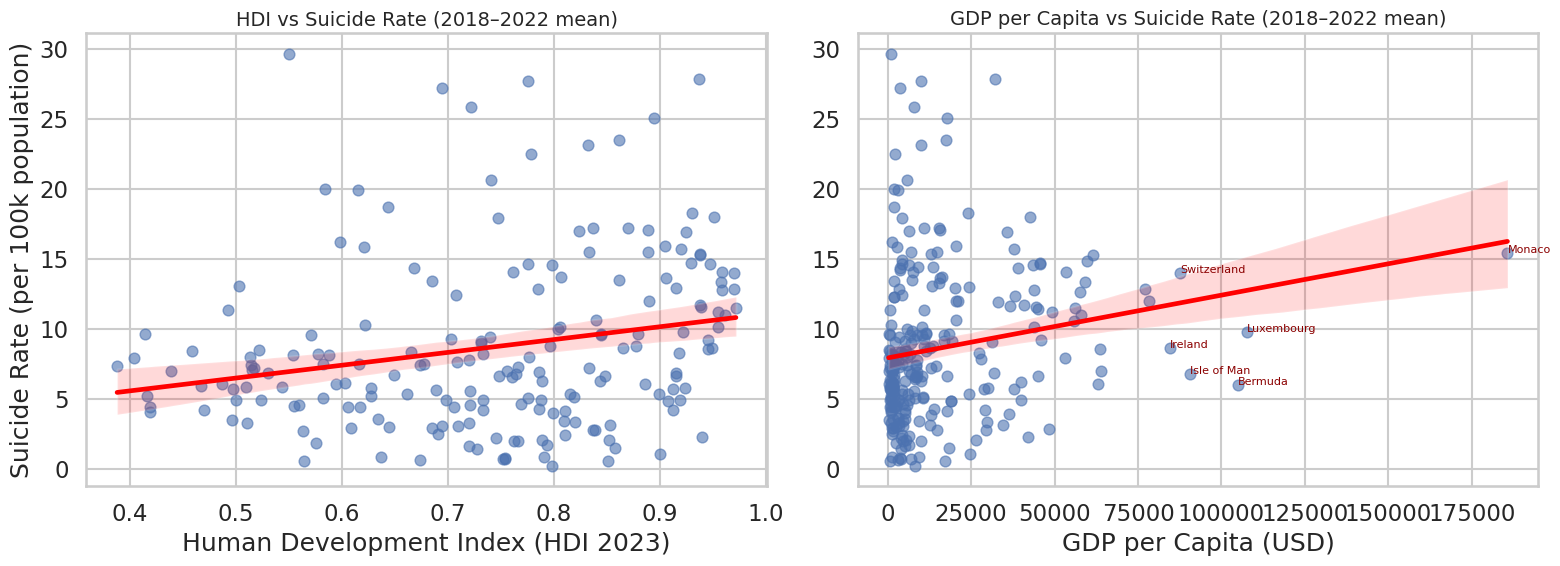

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot 1: HDI vs Suicide Rate
sns.regplot(
    x='HDI_2023', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[0]
)
axes[0].set_title('HDI vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[0].set_xlabel('Human Development Index (HDI 2023)')
axes[0].set_ylabel('Suicide Rate (per 100k population)')
print("Kiri (HDI vs Suicide Rate) → titik-titik agak menyebar tapi condong ke korelasi positif lemah (garis merah sedikit naik)")

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean,
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes[1]
)
axes[1].set_title('GDP per Capita vs Suicide Rate (2018–2022 mean)', fontsize=14)
axes[1].set_xlabel('GDP per Capita (USD)')
axes[1].set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga, tapi ini karena ada outlier")

# Identifikasi outlier GDP tinggi
outliers = df_merge_mean[df_merge_mean['GDP_per_capita'] > 80000]

for _, row in outliers.iterrows():
    plt.text(row['GDP_per_capita'], row['Suicide_rate'], row['Country Name'],
             fontsize=8, color='darkred')

plt.tight_layout()
plt.show()

Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga


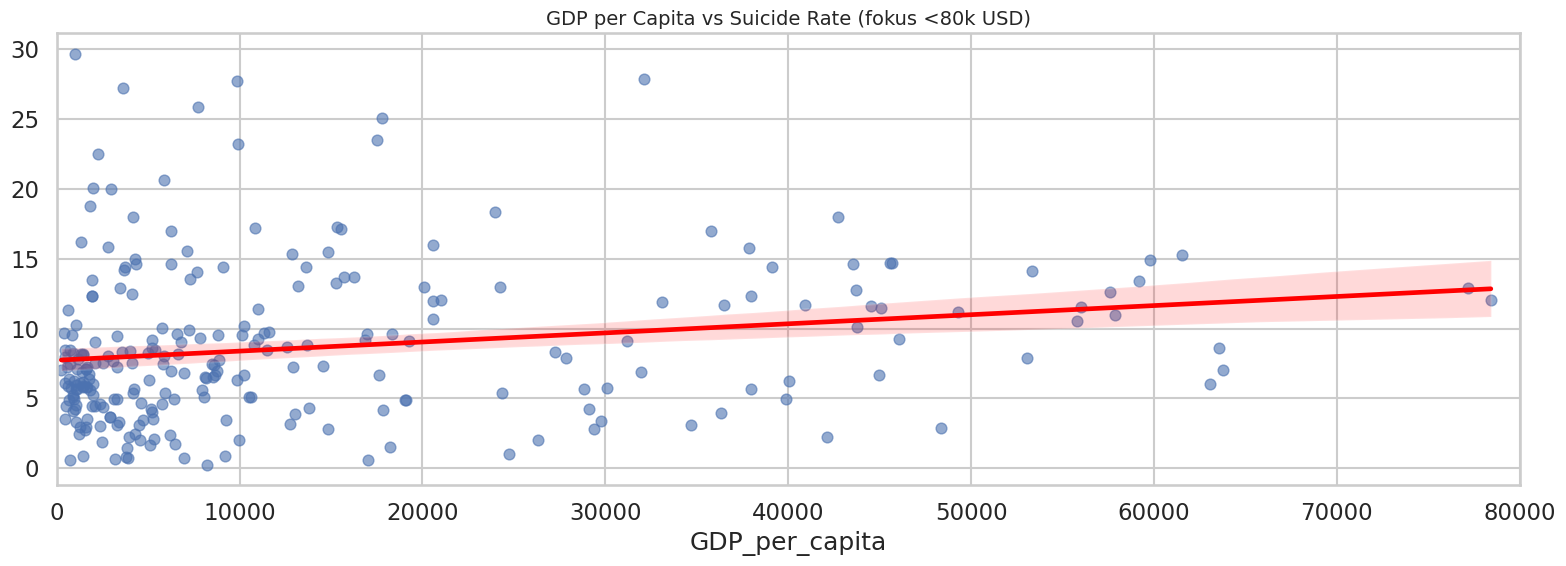

In [ ]:
# buat sampe 80000-an aja si-x nya, biar motong outliernya

sns.set(style="whitegrid", context="talk")
fig, axes = plt.subplots(1, figsize=(16, 6))

# Scatter Plot 2: GDP per capita vs Suicide Rate
sns.regplot(
    x='GDP_per_capita', y='Suicide_rate',
    data=df_merge_mean[df_merge_mean['GDP_per_capita'] < 80000],
    scatter_kws={'alpha':0.6, 's':60},
    line_kws={'color':'red'},
    ax=axes
)
axes.set_xlim(0, 80000)
axes.set_title('GDP per Capita vs Suicide Rate (fokus <80k USD)', fontsize=14)
axes.set_ylabel('')
print("Kanan (GDP per capita vs Suicide Rate) → polanya mirip, dengan tren lemah naik juga")

plt.tight_layout()
plt.show()

## Time Series Dataset in 2000s

Lihat apakah pertumbuhan ekonomi (GDP per capita) di suatu negara berjalan seiring atau berlawanan dengan tren bunuh diri.

In [ ]:
# Cara 1

indicators = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "SH.STA.SUIC.P5": "Suicide_rate"
}

years = [str(y) for y in range(2000, 2024)]

df_long = df[df["Indicator Code"].isin(indicators.keys())][["Country Name", "Indicator Code"] + years]

df_melt = df_long.melt(id_vars=["Country Name", "Indicator Code"], var_name="Year", value_name="Value")
df_pivot = df_melt.pivot_table(index=["Country Name", "Year"], columns="Indicator Code", values="Value").reset_index()
df_pivot = df_pivot.rename(columns=indicators)

df_pivot["Year"] = df_pivot["Year"].astype(int)
df_pivot = df_pivot.dropna(subset=["GDP_per_capita", "Suicide_rate"])

df_pivot.head()

Indicator Code,Country Name,Year,GDP_per_capita,Suicide_rate
0,Afghanistan,2000,308.318270,4.36
1,Afghanistan,2001,277.118051,4.38
2,Afghanistan,2002,338.139974,4.26
3,Afghanistan,2003,346.071627,4.24
4,Afghanistan,2004,338.637274,4.23


In [ ]:
# Cara 2 -> Ini versi cleaning yang lebih etis dibanding di atas ya

indicators = {
    "NY.GDP.PCAP.KD": "GDP_per_capita",
    "SH.STA.SUIC.P5": "Suicide_rate"
}

years = [str(y) for y in range(2000, 2024)]

df_long = df[df["Indicator Code"].isin(indicators.keys())][["Country Name", "Indicator Code"] + years]

# Ubah ke format long
df_melt = df_long.melt(id_vars=["Country Name", "Indicator Code"],
                       var_name="Year", value_name="Value")

# Pivot ke wide format
df_pivot = df_melt.pivot_table(index=["Country Name", "Year"],
                               columns="Indicator Code",
                               values="Value").reset_index()
df_pivot = df_pivot.rename(columns=indicators)
df_pivot["Year"] = df_pivot["Year"].astype(int)

# ======================================
# 🌱 Bagian Etis & Inklusif
# ======================================

# 1️⃣ Hitung proporsi data yang tersedia per negara
coverage = df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]].apply(
    lambda x: x.notna().mean()
).reset_index()
coverage.columns = ["Country Name", "GDP_per_capita_coverage", "Suicide_rate_coverage"]

# 2️⃣ Interpolasi data hilang antar tahun (jaga kontinuitas, tidak manipulatif)
df_pivot = df_pivot.sort_values(["Country Name", "Year"])
df_pivot[["GDP_per_capita", "Suicide_rate"]] = (
    df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]]
    .apply(lambda group: group.interpolate(method='linear', limit_direction='both'))
    .reset_index(drop=True)
)

# 3️⃣ Tambahkan flag reliabilitas berdasarkan coverage historis
df_pivot = df_pivot.merge(coverage, on="Country Name", how="left")
df_pivot["Data_quality_flag"] = np.where(
    (df_pivot["GDP_per_capita_coverage"] < 0.6) |
    (df_pivot["Suicide_rate_coverage"] < 0.6),
    "⚠️ Low data reliability",
    "✅ Sufficient data"
)


# 4️⃣ Dokumentasi etis
print("\n📘 Catatan Etis:")
print("- Tidak semua negara memiliki data lengkap antara 2000–2023.")
print("- Missing values diinterpolasi agar tren tetap terwakili.")
print("- Negara dengan <60% data valid ditandai sebagai 'Low data reliability'.")
print("- Pendekatan ini menjaga keadilan statistik dan menghindari bias terhadap negara berkembang.")

df_pivot.head()


📘 Catatan Etis:
- Tidak semua negara memiliki data lengkap antara 2000–2023.
- Missing values diinterpolasi agar tren tetap terwakili.
- Negara dengan <60% data valid ditandai sebagai 'Low data reliability'.
- Pendekatan ini menjaga keadilan statistik dan menghindari bias terhadap negara berkembang.


,Country Name,Year,GDP_per_capita,Suicide_rate,GDP_per_capita_coverage,Suicide_rate_coverage,Data_quality_flag
0,Afghanistan,2000,308.318270,4.36,1.0,0.916667,✅ Sufficient data
1,Afghanistan,2001,277.118051,4.38,1.0,0.916667,✅ Sufficient data
2,Afghanistan,2002,338.139974,4.26,1.0,0.916667,✅ Sufficient data
3,Afghanistan,2003,346.071627,4.24,1.0,0.916667,✅ Sufficient data
4,Afghanistan,2004,338.637274,4.23,1.0,0.916667,✅ Sufficient data


## Who Handles Growth Best?

Hitung seberapa besar suicide rate berubah terhadap kenaikan GDP per negara.

In [ ]:
#df = pd.read_csv("./Dataset/WDICSV-rev.csv")
df = pd.read_csv("WDICSV-rev.csv")

indicators = ['NY.GDP.PCAP.KD', 'SH.STA.SUIC.P5']
df_long = df[df["Indicator Code"].isin(indicators)]

years = [str(y) for y in range(2000, 2024)]
df_long = df_long.melt(
    id_vars=["Country Name", "Indicator Code"],
    value_vars=years,
    var_name="Year",
    value_name="Value"
)
df_long["Year"] = df_long["Year"].astype(int)
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")

df_long.head()

,Country Name,Indicator Code,Year,Value
0,Africa Eastern and Southern,NY.GDP.PCAP.KD,2000,1196.929766
1,Africa Eastern and Southern,SH.STA.SUIC.P5,2000,7.821675
2,Africa Western and Central,NY.GDP.PCAP.KD,2000,1184.360138
3,Africa Western and Central,SH.STA.SUIC.P5,2000,5.663385
4,Arab World,NY.GDP.PCAP.KD,2000,4915.070984


In [ ]:
df_pivot = df_long.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Code",
    values="Value"
).reset_index()

df_pivot = df_pivot.rename(columns={
    'NY.GDP.PCAP.KD': 'GDP_per_capita',
    'SH.STA.SUIC.P5': 'Suicide_rate'
})

df_pivot.head()

Indicator Code,Country Name,Year,GDP_per_capita,Suicide_rate
0,Afghanistan,2000,308.318270,4.36
1,Afghanistan,2001,277.118051,4.38
2,Afghanistan,2002,338.139974,4.26
3,Afghanistan,2003,346.071627,4.24
4,Afghanistan,2004,338.637274,4.23


In [ ]:
df_pivot = df_pivot.sort_values(["Country Name", "Year"])
df_pivot["GDP_growth"] = df_pivot.groupby("Country Name")["GDP_per_capita"].pct_change() * 100
df_pivot["Suicide_change"] = df_pivot.groupby("Country Name")["Suicide_rate"].pct_change() * 100

/tmp/ipython-input-1278238288.py:2: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-1278238288.py:3: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



In [ ]:
df_pivot.head()

Indicator Code,Country Name,Year,GDP_per_capita,Suicide_rate,GDP_growth,Suicide_change
0,Afghanistan,2000,308.318270,4.36,NaN,NaN
1,Afghanistan,2001,277.118051,4.38,-10.119484,0.458716
2,Afghanistan,2002,338.139974,4.26,22.020190,-2.739726
3,Afghanistan,2003,346.071627,4.24,2.345672,-0.469484
4,Afghanistan,2004,338.637274,4.23,-2.148212,-0.235849


In [ ]:
resilience_df = (
    df_pivot[df_pivot["Year"] >= 2000]
    .groupby("Country Name")[["GDP_growth", "Suicide_change"]]
    .mean()
    .reset_index()
)

In [ ]:
resilience_df = pd.merge(resilience_df, df_hdi, on="Country Name", how="left")
resilience_df.head()

,Country Name,GDP_growth,Suicide_change,HDI_2023
0,Afghanistan,1.295866,-0.811508,0.496
1,Africa Eastern and Southern,0.742705,0.303258,NaN
2,Africa Western and Central,1.961359,0.086982,NaN
3,Albania,4.506631,-1.423423,0.81
4,Algeria,1.212007,-2.545643,0.763


In [ ]:
# Ini versi lebih transparan dari yang atas ya

# === 1️⃣ Siapkan data dasar ===
#df = pd.read_csv("./Dataset/WDICSV-rev.csv")
df = pd.read_csv("WDICSV-rev.csv")

indicators = ['NY.GDP.PCAP.KD', 'SH.STA.SUIC.P5']
df_long = df[df["Indicator Code"].isin(indicators)]

years = [str(y) for y in range(2000, 2024)]
df_long = df_long.melt(
    id_vars=["Country Name", "Indicator Code"],
    value_vars=years,
    var_name="Year",
    value_name="Value"
)
df_long["Year"] = df_long["Year"].astype(int)
df_long["Value"] = pd.to_numeric(df_long["Value"], errors="coerce")

# === 2️⃣ Pivot ke wide format ===
df_pivot = df_long.pivot_table(
    index=["Country Name", "Year"],
    columns="Indicator Code",
    values="Value"
).reset_index()

df_pivot = df_pivot.rename(columns={
    'NY.GDP.PCAP.KD': 'GDP_per_capita',
    'SH.STA.SUIC.P5': 'Suicide_rate'
})

# === 3️⃣ Interpolasi untuk keadilan data (jangan drop negara berkembang) ===
df_pivot = df_pivot.sort_values(["Country Name", "Year"])
df_pivot[["GDP_per_capita", "Suicide_rate"]] = (
    df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]]
    .apply(lambda g: g.interpolate(method='linear', limit_direction='both'))
    .reset_index(drop=True)
)

# === 4️⃣ Hitung pertumbuhan & perubahan ===
df_pivot["GDP_growth"] = df_pivot.groupby("Country Name")["GDP_per_capita"].pct_change() * 100
df_pivot["Suicide_change"] = df_pivot.groupby("Country Name")["Suicide_rate"].pct_change() * 100

# Batasi outlier ekstrem agar tidak menyesatkan
df_pivot["GDP_growth"] = df_pivot["GDP_growth"].clip(-100, 100)
df_pivot["Suicide_change"] = df_pivot["Suicide_change"].clip(-100, 100)

# === 5️⃣ Hitung coverage data ===
coverage = df_pivot.groupby("Country Name")[["GDP_per_capita", "Suicide_rate"]].apply(
    lambda x: x.notna().mean()
).reset_index()
coverage.columns = ["Country Name", "GDP_coverage", "Suicide_coverage"]

# === 6️⃣ Hitung resilience per negara ===
resilience_df = (
    df_pivot.groupby("Country Name")[["GDP_growth", "Suicide_change"]]
    .mean()
    .reset_index()
)

# === 7️⃣ Gabungkan dengan HDI dan coverage ===
resilience_df = (
    resilience_df
    .merge(df_hdi, on="Country Name", how="left")
    .merge(coverage, on="Country Name", how="left")
)

# === 8️⃣ Tambahkan flag reliabilitas ===
resilience_df["Data_quality_flag"] = np.where(
    (resilience_df["GDP_coverage"] < 0.6) | (resilience_df["Suicide_coverage"] < 0.6),
    "⚠️ Low data reliability",
    "✅ Reliable"
)

print("✅ Data Resilience dengan Pertimbangan Etis:")
print(resilience_df.head())

print("\n📘 Catatan Etis:")
print("- Missing data diinterpolasi agar tren tidak bias terhadap negara berkembang.")
print("- Negara dengan data coverage <60% ditandai sebagai 'Low data reliability'.")
print("- Pertumbuhan ekstrem dibatasi antara -100% s.d. +100% untuk mencegah outlier misleading.")

✅ Data Resilience dengan Pertimbangan Etis:
                  Country Name  GDP_growth  Suicide_change HDI_2023  \
0                  Afghanistan    1.295866       -0.811508    0.496   
1  Africa Eastern and Southern    0.742705        0.303258      NaN   
2   Africa Western and Central    1.961359        0.086982      NaN   
3                      Albania    4.506631       -1.423423     0.81   
4                      Algeria    1.212007       -2.545643    0.763   

   GDP_coverage  Suicide_coverage Data_quality_flag  
0           1.0               1.0        ✅ Reliable  
1           1.0               1.0        ✅ Reliable  
2           1.0               1.0        ✅ Reliable  
3           1.0               1.0        ✅ Reliable  
4           1.0               1.0        ✅ Reliable  

📘 Catatan Etis:
- Missing data diinterpolasi agar tren tidak bias terhadap negara berkembang.
- Negara dengan data coverage <60% ditandai sebagai 'Low data reliability'.
- Pertumbuhan ekstrem dibatasi ant

/tmp/ipython-input-3358441304.py:41: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.

/tmp/ipython-input-3358441304.py:42: FutureWarning:

The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.



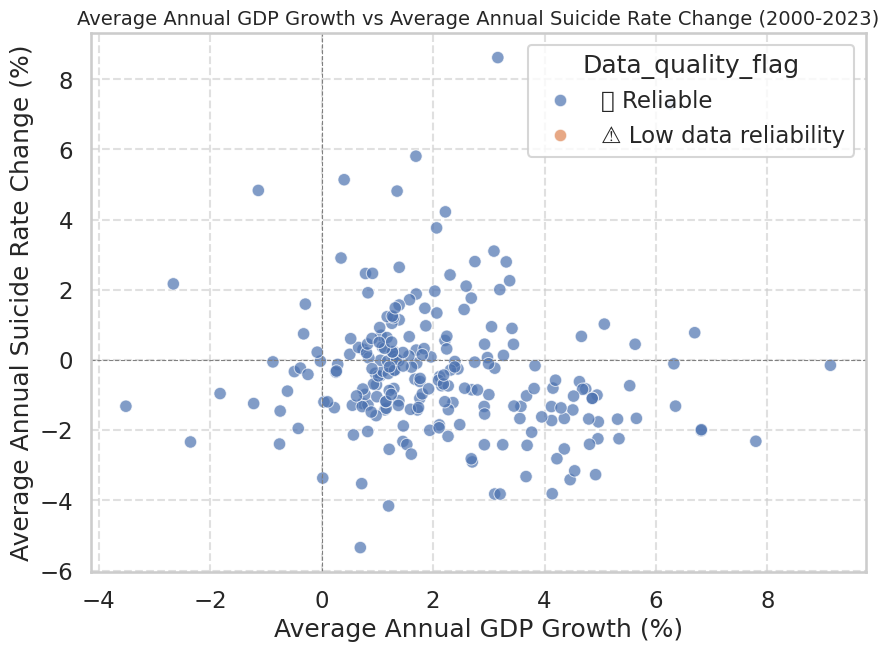


Interpretasi Scatter Plot:
- Titik di kuadran kiri atas: Negara dengan rata-rata pertumbuhan GDP negatif dan penurunan tingkat bunuh diri.
- Titik di kuadran kanan atas: Negara dengan rata-rata pertumbuhan GDP positif dan kenaikan tingkat bunuh diri.
- Titik di kuadran kiri bawah: Negara dengan rata-rata pertumbuhan GDP negatif dan kenaikan tingkat bunuh diri.
- Titik di kuadran kanan bawah: Negara dengan rata-rata pertumbuhan GDP positif dan penurunan tingkat bunuh diri.
- Warna titik menunjukkan reliabilitas data ('✅ Reliable' atau '⚠️ Low data reliability').


In [ ]:
# Scatter plot of average GDP growth vs average suicide rate change
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=resilience_df,
    x='GDP_growth',
    y='Suicide_change',
    hue='Data_quality_flag', # Color based on data quality
    alpha=0.7,
    s=80
)

plt.title('Average Annual GDP Growth vs Average Annual Suicide Rate Change (2000-2023)', fontsize=14)
plt.xlabel('Average Annual GDP Growth (%)')
plt.ylabel('Average Annual Suicide Rate Change (%)')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8) # Add horizontal line at 0 for Suicide Change
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8) # Add vertical line at 0 for GDP Growth
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

print("\nInterpretasi Scatter Plot:")
print("- Titik di kuadran kiri atas: Negara dengan rata-rata pertumbuhan GDP negatif dan penurunan tingkat bunuh diri.")
print("- Titik di kuadran kanan atas: Negara dengan rata-rata pertumbuhan GDP positif dan kenaikan tingkat bunuh diri.")
print("- Titik di kuadran kiri bawah: Negara dengan rata-rata pertumbuhan GDP negatif dan kenaikan tingkat bunuh diri.")
print("- Titik di kuadran kanan bawah: Negara dengan rata-rata pertumbuhan GDP positif dan penurunan tingkat bunuh diri.")
print("- Warna titik menunjukkan reliabilitas data ('✅ Reliable' atau '⚠️ Low data reliability').")

## EDA



Data time series -> df_pivot

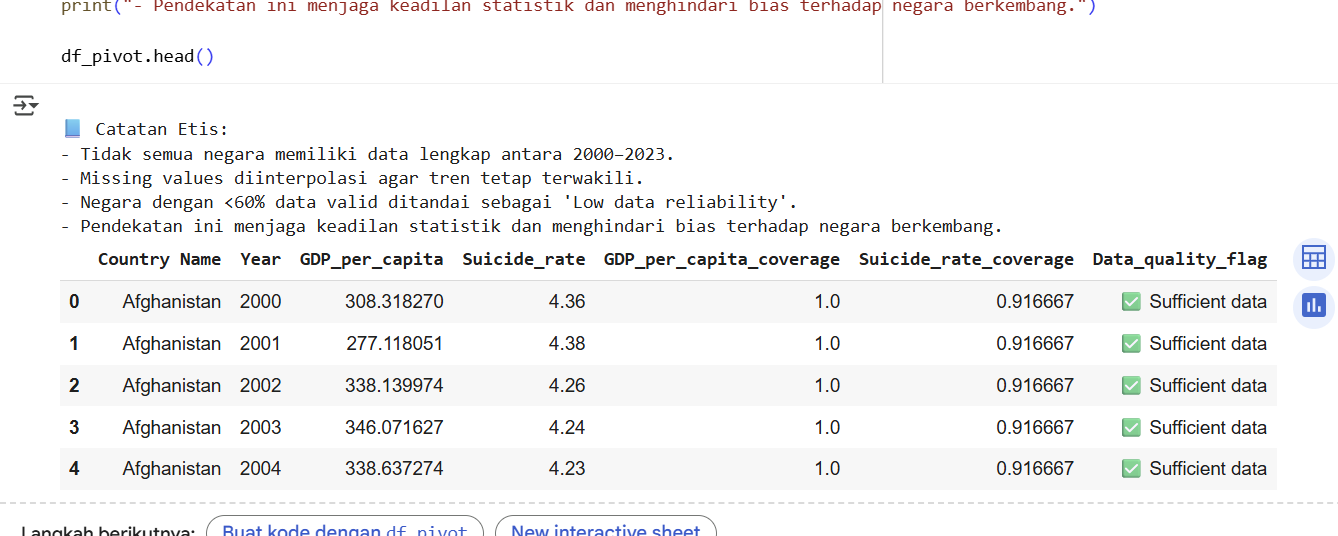

Data HDI di 2023 doang -> df_merge_mean
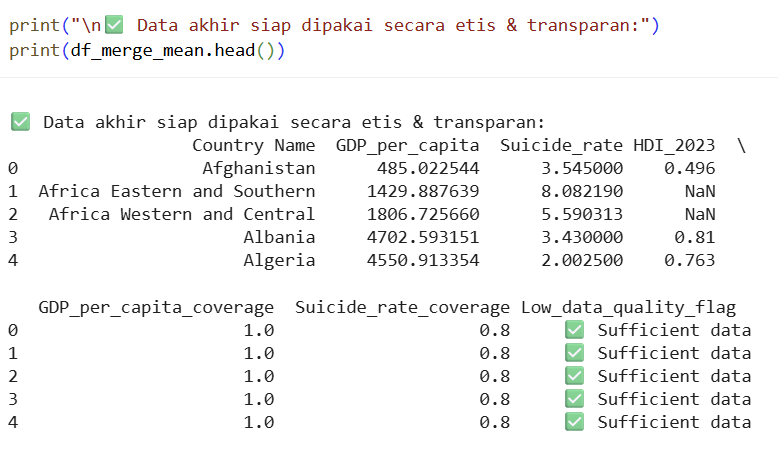

In [ ]:
# INI APA DE MKSDNYA KALAU COVERAGE NYA MASIH ADA YANG 0 ?
resilience_df['Suicide_coverage'].value_counts()

,count
Suicide_coverage,
1.0,233
0.0,29


In [ ]:
resilience_df['GDP_coverage'].value_counts()

,count
GDP_coverage,
1.0,260
0.0,2


In [ ]:
resilience_df['Data_quality_flag'].value_counts()

,count
Data_quality_flag,
✅ Reliable,231
⚠️ Low data reliability,31


📈 Korelasi Matrix:


/tmp/ipython-input-198342083.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,HDI_2023,GDP_per_capita,Suicide_rate,GDP_per_capita_coverage,Suicide_rate_coverage
HDI_2023,1.000,0.690,0.228,0.102,-0.128
GDP_per_capita,0.690,1.000,0.186,0.022,-0.077
Suicide_rate,0.228,0.186,1.000,-0.051,0.033
GDP_per_capita_coverage,0.102,0.022,-0.051,1.000,0.130
Suicide_rate_coverage,-0.128,-0.077,0.033,0.130,1.000


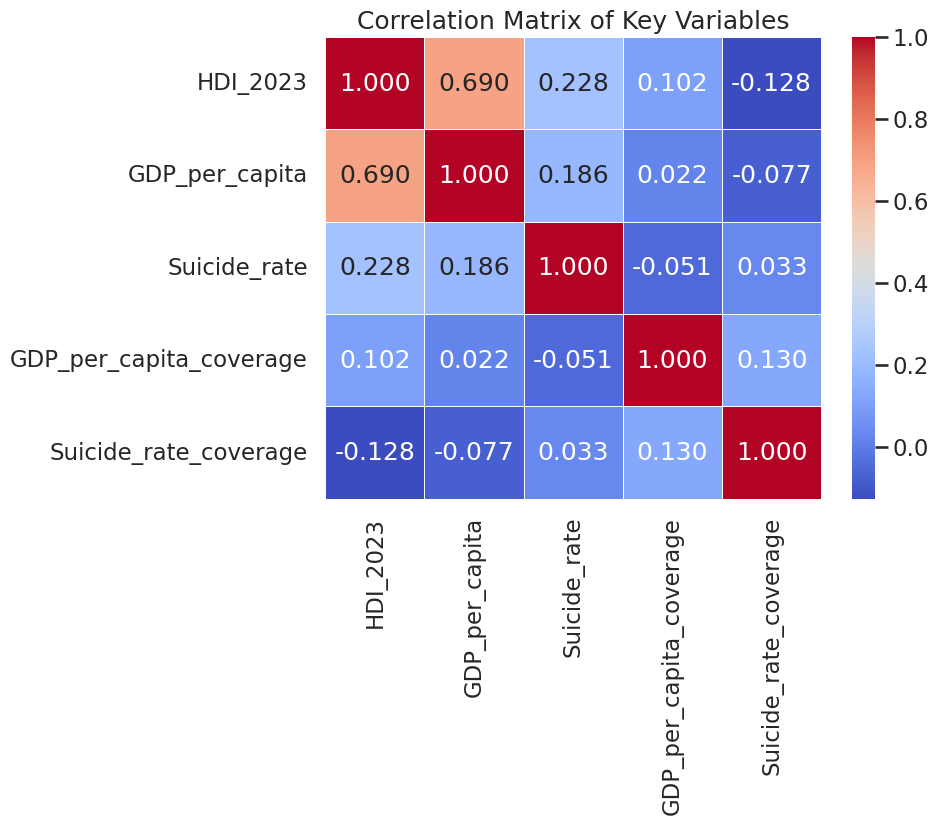

In [ ]:
# Cek korelasi variabel numerik ajah
data_for_corr = df_merge_mean[['HDI_2023', 'GDP_per_capita', 'Suicide_rate', 'GDP_per_capita_coverage', 'Suicide_rate_coverage']]

for col in data_for_corr.columns:
    data_for_corr[col] = pd.to_numeric(data_for_corr[col], errors='coerce')

data_for_corr = data_for_corr.dropna()
corr_matrix = data_for_corr.corr()

print("📈 Korelasi Matrix:")
display(corr_matrix.round(3))

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()

In [ ]:
# pip install plotly statsmodels scikit-learn pycountry
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
sns.set(style="whitegrid", context="talk")

In [ ]:
# 1️⃣ CHOROPLETH MAP (PER TAHUN)
fig = px.choropleth(
    df_pivot,
    locations="Country Name",
    locationmode="country names",
    color="Suicide_rate",
    hover_name="Country Name",
    hover_data=["GDP_per_capita"],
    animation_frame="Year",
    color_continuous_scale="Reds",
    title="Choropleth map of Global Suicide Rate (2000–2023) per tahun",
)

fig.update_layout(
    width=1000,
    height=720,
    title_x=0.5,
    coloraxis_colorbar_title="Suicide rate<br>(per 100k)"
)
fig.show()

Ini HDI nya jadi ambil average di tahun 2023 doang karena cuman ada datanya di tahun 2023, makanya jadi lurus segitu doang


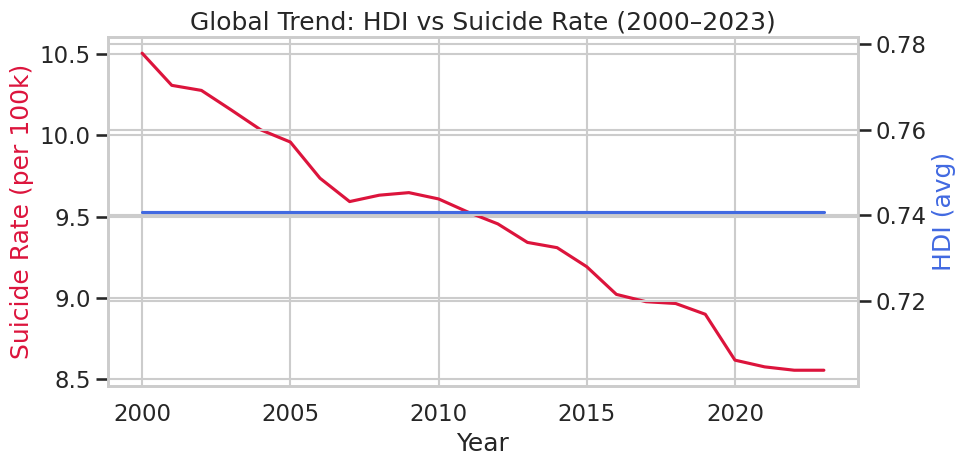

In [ ]:
# 2️⃣ GLOBAL TIME SERIES: HDI vs Suicide Rate
# rata-rata global per tahun
global_trend = (
    df_pivot.groupby("Year")[["Suicide_rate", "GDP_per_capita"]].mean().reset_index()
)
global_trend = global_trend.merge(
    df_merge_mean[["HDI_2023"]].mean().to_frame().T.assign(Year=global_trend["Year"]),
    on="Year", how="left"
)
global_trend["HDI_2023"] = df_merge_mean["HDI_2023"].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(global_trend["Year"], global_trend["Suicide_rate"], color="crimson", label="Suicide Rate")
ax2 = ax1.twinx()
ax2.plot(global_trend["Year"], global_trend["HDI_2023"], color="royalblue", label="HDI (avg)")

ax1.set_xlabel("Year")
ax1.set_ylabel("Suicide Rate (per 100k)", color="crimson")
ax2.set_ylabel("HDI (avg)", color="royalblue")
plt.title("Global Trend: HDI vs Suicide Rate (2000–2023)")

print("Ini HDI nya jadi ambil average di tahun 2023 doang karena cuman ada datanya di tahun 2023, makanya jadi lurus segitu doang")
plt.tight_layout()
plt.show()

In [ ]:
# 3️⃣ SCATTER PLOT: HDI 2023 vs Suicide Rate
fig = px.scatter(
    df_merge_mean,
    x="HDI_2023",
    y="Suicide_rate",
    color="GDP_per_capita",
    size="GDP_per_capita",
    hover_name="Country Name",
    template="plotly_white",
    trendline="ols",
    title="HDI vs Suicide Rate in Year 2023 — Colored by GDP per Capita",
)

fig.update_layout(
    width=950,
    height=550,
    title_x=0.5,
    coloraxis_colorbar_title="GDP per Capita"
)
fig.show()

In [ ]:
# 4️⃣ POLYNOMIAL + LOESS (by Region)

# INI KALAU ADA BUAT FENG DUMMY REGION BISA CATEGORY PER REGION

# fig_poly = px.scatter(
#     df_merge_mean,
#     x="HDI_2023",
#     y="Suicide_rate",
#     color="Region",
#     trendline="lowess",
#     hover_name="Country Name",
#     title="📊 HDI vs Suicide Rate (LOESS Trend by Region)",
#     template="plotly_white"
# )
# fig_poly.update_layout(width=950, height=550, title_x=0.5)
# fig_poly.show()

In [ ]:
# 5️⃣ ANOMALY HIGHLIGHTING
#Highlight outlier: Korea Selatan, Jepang, Lithuania (HDI tinggi tapi suicide tinggi)
#Negara kontras: Norwegia, Finland (HDI tinggi, suicide rendah)
highlight_countries = ["Korea, Rep.", "Japan", "Lithuania", "Norway", "Finland", "Indonesia", "Turkiye", "Brazil", "Russian Federation"]
subset = df_merge_mean[df_merge_mean["Country Name"].isin(highlight_countries)]

fig = px.scatter(
    df_merge_mean,
    x="HDI_2023",
    y="Suicide_rate",
    opacity=0.4,
    color="GDP_per_capita",
    hover_name="Country Name",
    template="plotly_white"
)
fig.add_trace(go.Scatter(
    x=subset["HDI_2023"],
    y=subset["Suicide_rate"],
    mode="markers+text",
    text=subset["Country Name"],
    textposition="top center",
    marker=dict(size=16, color="blue", symbol="star"),
    name="Highlighted"
))

fig.update_layout(
    title="🔎 Outlier Countries: HDI high but Suicide high (or low)",
    legend=dict(
        x=0.01,         # posisi horizontal (0 = kiri)
        y=0.99,         # posisi vertikal (1 = atas)
        bgcolor="rgba(255,255,255,0.7)",
        bordercolor="gray",
        borderwidth=1
    )
)

fig.show()

In [ ]:
# 6️⃣ REGIONAL TREND LINES (Over Time)
# Plot HDI vs suicide rate per region (multi-line).
if "Region" in df_merge_mean.columns:
    # rata-rata suicide rate per region per tahun
    region_trend = (
        df_pivot.merge(df_merge_mean[["Country Name", "Region"]], on="Country Name", how="left")
        .groupby(["Region", "Year"])["Suicide_rate"]
        .mean()
        .reset_index()
    )

    fig = px.line(
        region_trend,
        x="Year",
        y="Suicide_rate",
        color="Region",
        markers=True,
        title="📊 Suicide Rate Trend by Region (2000–2023)",
        template="plotly_white"
    )
    fig.update_layout(width=950, height=550, title_x=0.5)
    fig.show()

    # liat apakah Asia Timur punya tren berbeda
    east_asia = region_trend[region_trend["Region"].str.contains("East Asia", case=False, na=False)]
    if not east_asia.empty:
        fig_east = px.line(
            east_asia, x="Year", y="Suicide_rate",
            title="📈 East Asia: Suicide Rate Over Time",
            markers=True, template="plotly_white"
        )
        fig_east.update_layout(width=800, height=450, title_x=0.5)
        fig_east.show()

# Modeling